# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands



# Step 1 - Importing, Reading and Interpreting the bike-sharing dataset

Let us first import Numpy and Pandas and read the dataset

In [2]:
#Supress any warnings which we may encounter

import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the required libraries for model building

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm

In [4]:
#Reading the dataset provided
bike_data = pd.read_csv(r'C:\Users\darkn\Desktop\UpGrad- Executive PG Programme in Data Science\Linear Regression\Linear Regression Assignment\day.csv')


bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Gain further information regarding the dataset using shape and info commands

In [5]:
bike_data.shape

(730, 16)

As we can see from the shape command abve, the dataset has 730 rows and 16 columns

In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


Basis the info() function, we can ascertain that there are no null values in the dataset. 
Additionally, we can figure out the datatypes as well.

In [7]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Check for any duplicate entries
bike_data.duplicated().sum()

0

As we can see from the above function, there are no duplicate values in the dataset

In [9]:
#checking for missing values in the dataset
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Observations of the dataset:
    
1. Instant column is for indexing only. It has no impact on the dataset. Therefore, we will drop it. 
2. temp and atemp are correlated to each other. We will use temp only and drop
atemp.
3. Column dteday is an additional column as we have another column named weekday as well. We don't need dteday for our model building, therefore, it will be dropped too.
4. The variables casual and registered are summed up to get cnt which is our target variable. We will drop casual and registered because they won't be significant in our analysis.

In [10]:
# drop columns instance,casual, registered and atemp
bike_data.drop(['instant','casual','registered','atemp'], axis=1, inplace=True)

In [11]:
# After droppping the variables checking the columns abnd rows in the dataframe
bike_data.shape

(730, 12)

In [12]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [13]:
 #drop column dteday
bike_data.drop(['dteday'], axis=1, inplace=True)

In [14]:
bike_data.shape

(730, 11)

In [15]:
#Identify the categorical variables in the dataset
categorical_var = ['season','yr','mnth','holiday','weekday', 'workingday','weathersit']

In [16]:
#Identify the numerical variables in the dataset
numerical_var = ['temp', 'hum','windspeed','cnt']

In [17]:
#convert datatype of categorical variables
bike_data[categorical_var] = bike_data[categorical_var].astype('category')

In [18]:
# get insights of numeric variables
bike_data.describe()

,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849
std,7.506729,14.237589,5.195841,1936.011647
min,2.424346,0.000000,1.500244,22.000000
25%,13.811885,52.000000,9.041650,3169.750000
50%,20.465826,62.625000,12.125325,4548.500000
75%,26.880615,72.989575,15.625589,5966.000000
max,35.328347,97.250000,34.000021,8714.000000


In [19]:
# get the insights of categorical variables
bike_data.describe(include=['category'])

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730,730,730,730,730,730,730
unique,4,2,12,2,7,2,3
top,3,1,12,0,2,1,1
freq,188,365,62,709,105,504,463


In [20]:
#Mapping the columns as per the data dictionary provided
bike_data['season'] = bike_data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [21]:
bike_data['weekday'] = bike_data['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

In [22]:
bike_data['mnth'] = bike_data['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct',
                             11: 'nov', 12:'dec'})

In [23]:
bike_data['weathersit'] = bike_data['weathersit'].map({1: 'Clear_FewClouds', 2: 'Mist_Cloudy', 3: 'LightSnow_LightRain', 4: 'HeavyRain_IcePallets'})

# Step 2: Visualization of the Dataset

This is one of the most important steps whch plays critical role in understanding the dataset. This step has the following benefits:
    
    1. It will help us to understand if there is any multicollinearity present in the dataset. If yes, we can determine it here. 
    2. We can identify if some predictors have strong association with the target variable i.e. 'cnt'

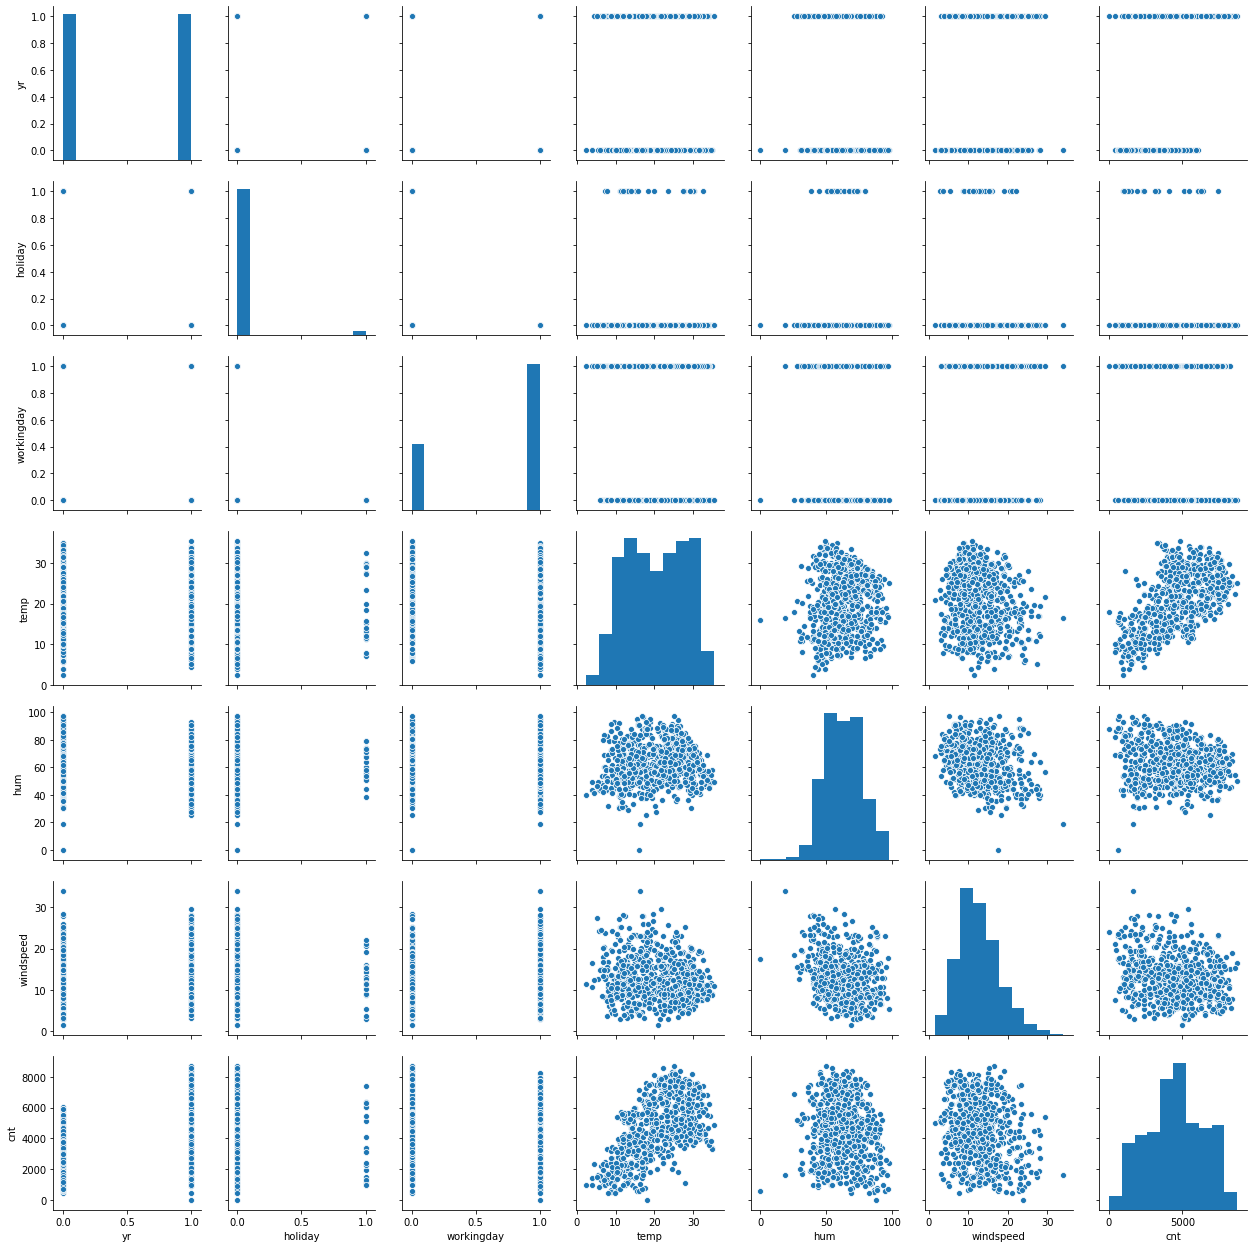

In [24]:
#Visualising the dataset
sns.pairplot(bike_data)
plt.show()

# Visualizing numerical variables

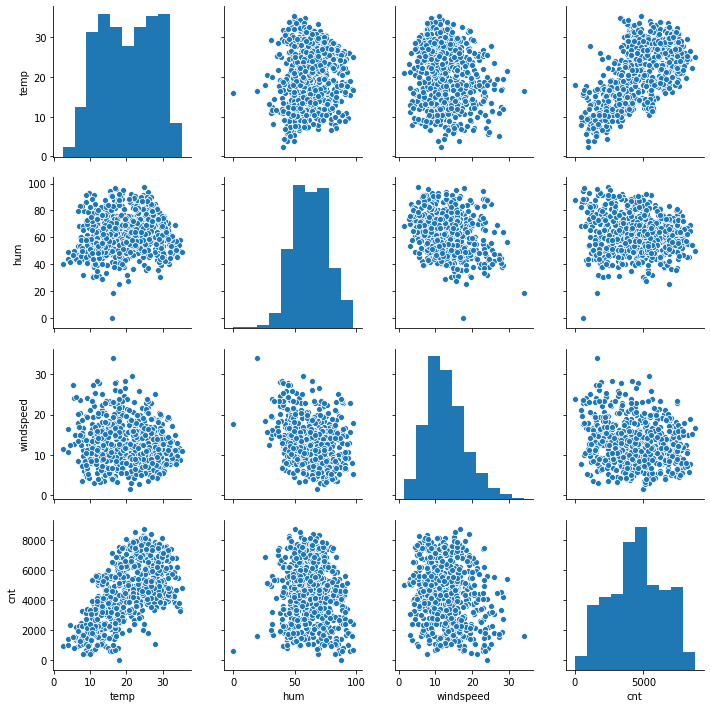

In [25]:
#Pairplot for numeric variables
sns.pairplot(bike_data, vars=['temp', 'hum','windspeed','cnt'])
plt.show()

As we can ascertain from the pairplots above, there are a few variables which are positively correlated to the target variable i.e. 'cnt'

As per our findings, bike rentals are most correlated to the variable 'temp'

# Visualizing the categorical variables

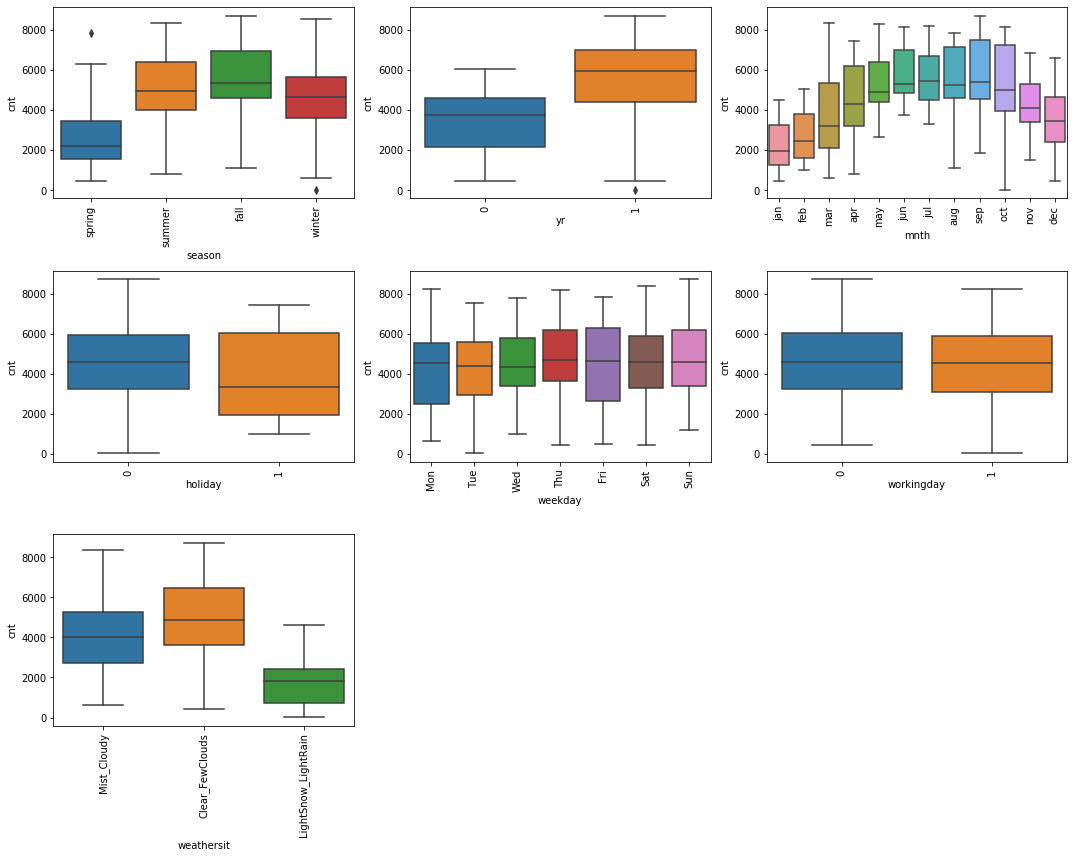

In [26]:
#Now, we will begin with visualising the categorical variables to draw more insights

# Box plot for categorical variables
col = 3
row = len(categorical_var)//col+1

plt.figure(figsize=(15,12))
for i in list(enumerate(categorical_var)):
    plt.subplot(row,col,i[0]+1)
    sns.boxplot(x = i[1], y = 'cnt', data = bike_data)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1)    
plt.show()

As per the box plot above, we can determine that there is a relationship between the categorical variables and the Target variable i.e. 'Count'.

The findings from the boxplots are:
- Bike rentals happened more during the Fall season and then in summer season.
- There was an increase in the number of bike rentals in 2019 as compared to 2018.
- People preferred bike rentals mostly in partly cloudy weather.
- Most of the bike rentals were availed on 3 specific days of the week, namely, Wednesday, Thursday and Saturday.

# Univariate Analysis

1: Weather vs Target

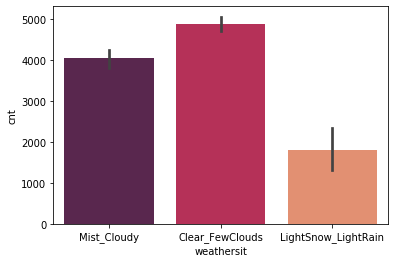

In [27]:
#Relation between weather and count of bike rentals
sns.barplot('weathersit','cnt',palette="rocket",data=bike_data)

plt.show()

Bike Rentals are more in the partly cloudy weather

2. Temperature vs Target

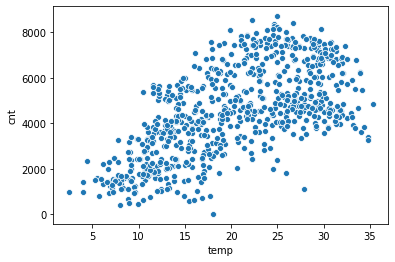

In [28]:
#Scatter plot for Temperature vs Count
sns.scatterplot(x='temp',y='cnt' ,data=bike_data)

plt.show()

Bike Rentals are observed at higher temperatures

3. Humidity vs Target variable

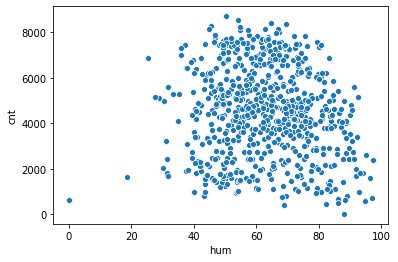

In [29]:
sns.scatterplot(x='hum', y='cnt',data=bike_data)
plt.show()


Bike rentals are availed more when the humidity is high

4: Season vs Target

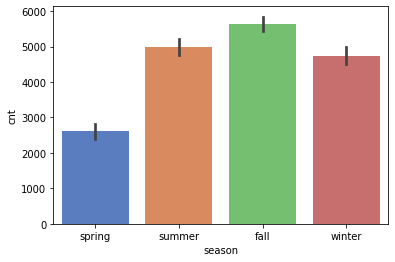

In [30]:
#Relation between season and count of bike rentals

sns.barplot('season','cnt',data=bike_data,palette="muted",)
plt.show()

In [31]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,Mon,1,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,Tue,1,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,Wed,1,Clear_FewClouds,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,Thu,1,Clear_FewClouds,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,Fri,1,Clear_FewClouds,9.305237,43.6957,12.522300,1600


Bike Rentals are more during the Fall season and then in summer

5. Year vs Count

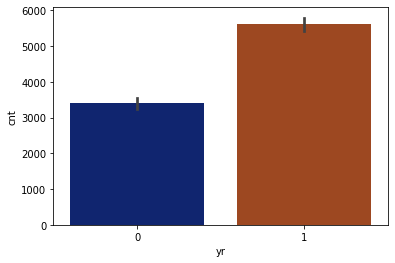

In [32]:
#Trying to establish relationship between Year and Count

bike_data.head()
sns.barplot('yr','cnt',data=bike_data,palette='dark')

plt.show()

Basis the details mentioned in data dictionary, we can see that the bike rentals were higher in 2019 as compared to 2018.

6. Month vs Target variable

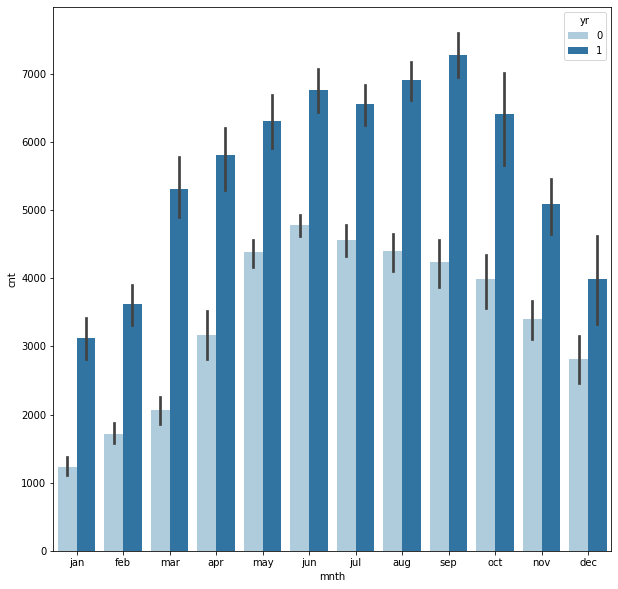

In [33]:
#Plotting to establish relationship between Month  column and Count.
plt.figure(figsize=(10,10))
sns.barplot('mnth','cnt',hue='yr',data=bike_data,palette='Paired')
plt.show()

Bike Rentals are more in the year 2019 compared to 2018

# Bi-variate Analysis

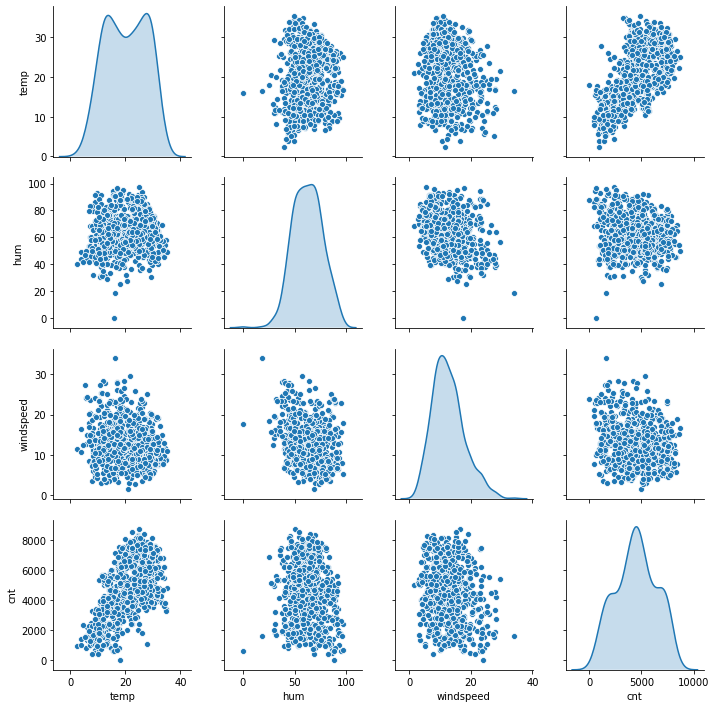

In [34]:
# pairplot for continuous data type
sns.pairplot(bike_data.select_dtypes(['int64','float64']), diag_kind='kde')
plt.show()

From the above pairplot we could observe that, temp has highest positive correlation with target variable 'cnt'.

# Heatmap Analysis

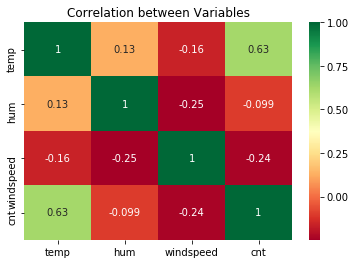

In [35]:
#Heatmap to see correlation between variables

sns.heatmap(bike_data[numerical_var].corr(), cmap='RdYlGn', annot=True)
plt.title("Correlation between Variables")
plt.show()

As per the heatmap analysis above, below are the observations:

1. Positive correalation observed between cnt and temp (0.63)
2. Negative correlation observed for cnt with hum and windspeed (-0.099 and -0.24)

Insights:
Q. From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

Answer:

1. The demad of bike is less in the month of spring when compared with other seasons
2. The demand bike increased in the year 2019 when compared with year 2018.
3. Month Jun to Sep is the period when bike demand is high. The Month Jan is the lowest demand month.
4. Bike demand is less in holidays in comparison to not being holiday.
5. The demand of bike is almost similar throughout the weekdays.
6. There is no significant change in bike demand with workign day and non working day.
7. The bike demand is high when weather is clear and Few clouds however demand is less in case of Lightsnow and light rainfall. 8. We do not have any data for Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog , so we can not derive any conclusion. May be the company is not operating on those days or there is no demand of bike.

In [36]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,Mon,1,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,Tue,1,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,Wed,1,Clear_FewClouds,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,Thu,1,Clear_FewClouds,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,Fri,1,Clear_FewClouds,9.305237,43.6957,12.522300,1600


# Step 3: Data Preparation

Creating dummy variables for the dataset

In [37]:
import pandas as pd

In [38]:
# get dummy variables for season, weekday, mnth and weathersit
bike_data=pd.get_dummies(data=bike_data, columns=['season', 'mnth','yr','weekday','weathersit'], drop_first = True)




bike_data.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sep,yr_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#Now, lets check the number of rows and columns again.
bike_data.shape

(730, 29)

In [40]:
# Check datafrmae
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
holiday                           730 non-null category
workingday                        730 non-null category
temp                              730 non-null float64
hum                               730 non-null float64
windspeed                         730 non-null float64
cnt                               730 non-null int64
season_spring                     730 non-null uint8
season_summer                     730 non-null uint8
season_winter                     730 non-null uint8
mnth_aug                          730 non-null uint8
mnth_dec                          730 non-null uint8
mnth_feb                          730 non-null uint8
mnth_jan                          730 non-null uint8
mnth_jul                          730 non-null uint8
mnth_jun                          730 non-null uint8
mnth_mar                          730 non-null uint8
mnth_may                          7

In [42]:
# Convert categorical columns to numeric 
bike_data[['yr_1','holiday','workingday']]= bike_data[['yr_1','holiday','workingday']].astype('uint8')
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
holiday                           730 non-null uint8
workingday                        730 non-null uint8
temp                              730 non-null float64
hum                               730 non-null float64
windspeed                         730 non-null float64
cnt                               730 non-null int64
season_spring                     730 non-null uint8
season_summer                     730 non-null uint8
season_winter                     730 non-null uint8
mnth_aug                          730 non-null uint8
mnth_dec                          730 non-null uint8
mnth_feb                          730 non-null uint8
mnth_jan                          730 non-null uint8
mnth_jul                          730 non-null uint8
mnth_jun                          730 non-null uint8
mnth_mar                          730 non-null uint8
mnth_may                          730 non

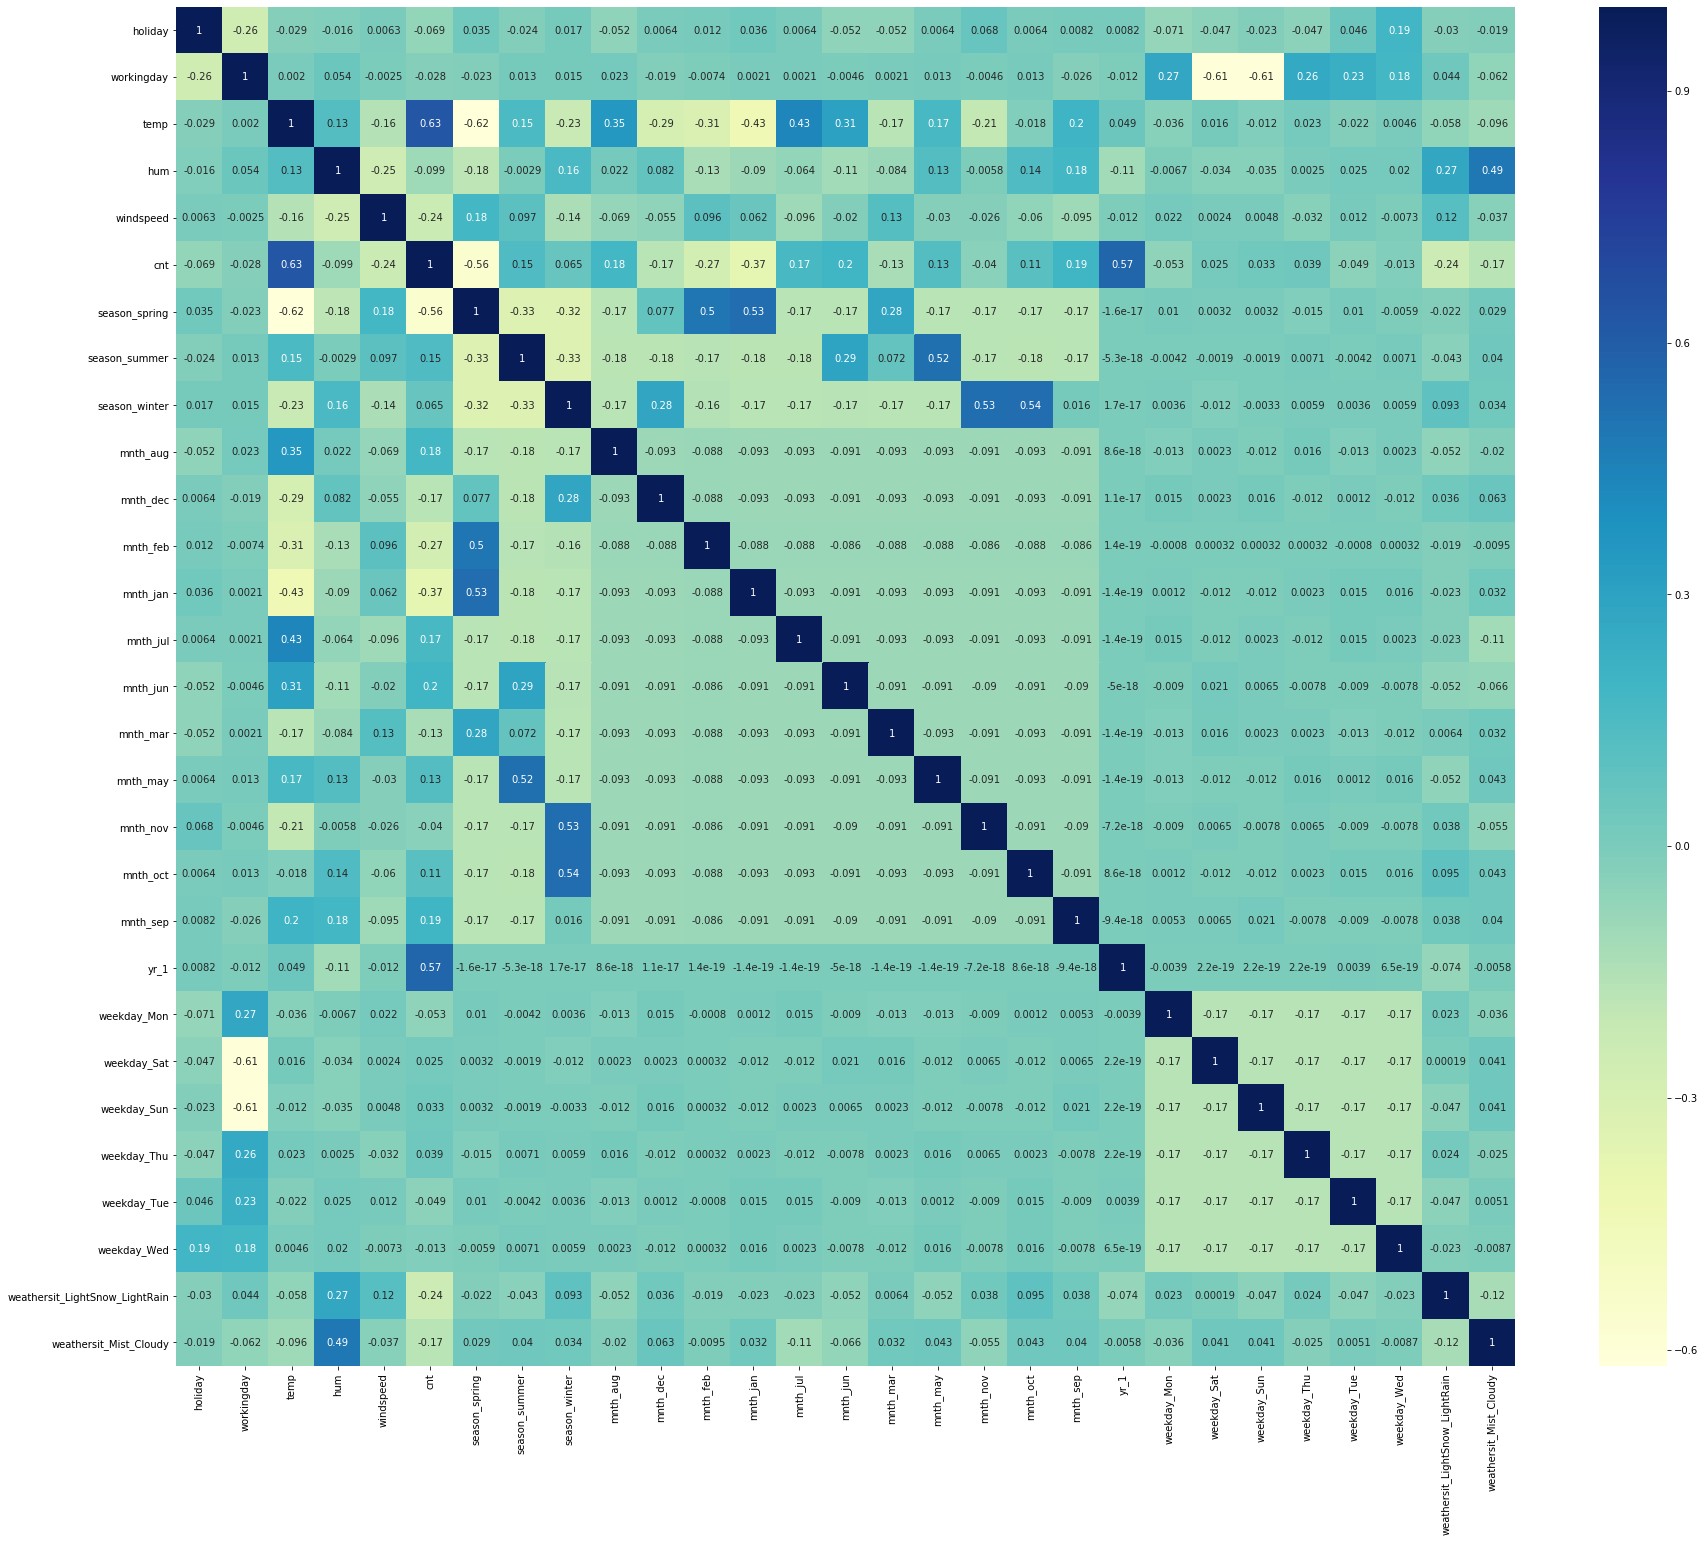

In [43]:
#Now, lets recheck the heatmap to determine the correlation between all the remaining variables

plt.figure(figsize=(30, 25))
sns.heatmap(bike_data.corr(), cmap='YlGnBu', annot = True)
plt.show()

As we can now determine from the heatmap above, variables like Temperature,Summer season and months from June to october are in good correlation with the Target variable.
The variables mentioned above have a good influence on the number of bike rentals.

# Step 4: Splitting the data into Training and Test sets

Before we proceed with building the moel, we will first need to split the data in Training and test sets. Further, we will need to scale the features for our analysis

In [44]:
# Split train test dataset
np.random.seed(0)
df_train, df_test = train_test_split(bike_data, train_size = 0.7, random_state = 10 )
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


# Rescaling the features

In [45]:
# Scaling of train set

# instantiate an object
scaler = MinMaxScaler()

# fit and transform on training data
df_train[numerical_var] = scaler.fit_transform(df_train[numerical_var])
df_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sep,yr_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
72,0,1,0.298094,0.393891,0.236118,0.194978,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
510,0,0,0.778657,0.694105,0.364071,0.737052,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
700,0,1,0.327249,0.809877,0.210252,0.509236,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
264,0,0,0.694699,0.910249,0.217975,0.526862,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
577,0,1,0.811368,0.624004,0.244886,0.863093,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


# Dividing the data into X and Y for model building

In [46]:
# Creating X and y data dataframe for train set
y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()


,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,...,mnth_sep,yr_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
72,0,1,0.298094,0.393891,0.236118,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
510,0,0,0.778657,0.694105,0.364071,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
700,0,1,0.327249,0.809877,0.210252,0,0,1,0,1,...,0,1,1,0,0,0,0,0,0,1
264,0,0,0.694699,0.910249,0.217975,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
577,0,1,0.811368,0.624004,0.244886,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


# Step 5: Building a Linear model

We will be using Recursive Feature Elimination method firstly.

In [47]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)



rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [48]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('mnth_aug', False, 2),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 3),
 ('mnth_mar', False, 10),
 ('mnth_may', False, 6),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 14),
 ('mnth_sep', True, 1),
 ('yr_1', True, 1),
 ('weekday_Mon', False, 13),
 ('weekday_Sat', False, 8),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 5),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 11),
 ('weathersit_LightSnow_LightRain', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [49]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sep',
       'yr_1', 'weathersit_LightSnow_LightRain', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [50]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

# Building model using statsmodel


In [51]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [52]:
# create function for stats linear model 
def sm_linearmodel(X_train_sm):
    #Add constant
    X_train_sm = sm.add_constant(X_train_sm)

    # create a fitted model (1st model)
    lm = sm.OLS(y_train,X_train_sm).fit()
    return lm

In [53]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [54]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              834.4
Date:                Fri, 13 May 2022   Prob (F-statistic):                        0.00
Time:                        10:33:08   Log-Likelihood:                          418.87
No. Observations:                 510   AIC:                                     -807.7
Df Residuals:                     495   BIC:                                     -744.2
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

# Checking VIF

In [55]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,17.26
1,temp,13.62
3,windspeed,4.79
4,season_spring,4.47
5,season_winter,2.82
14,weathersit_Mist_Cloudy,2.50
8,mnth_jan,2.40
7,mnth_feb,2.16
12,yr_1,2.08
10,mnth_nov,1.88


We will drop the 'humidity' variable as its insignificant due to High VIF.

# Rebuilding the model without 'humidity'

In [56]:
#We have high VIF for 'hum' column. so we can drop the column and fit the model again.
X_train=X_train.drop('hum', 1)

In [57]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [58]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     97.10
Date:                Fri, 13 May 2022   Prob (F-statistic):          7.16e-176
Time:                        10:33:28   Log-Likelihood:                 487.72
No. Observations:                 510   AIC:                            -919.4
Df Residuals:                     482   BIC:                            -800.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.3547      0.079      4.487      0.000       0.199       0.510
holiday                           -0.1120      0.057     -1.960      0.051      -0.224       0.000
workingday                        -0.0493      0.063     -0.778      0.437      -0.174       0.075
temp                               0.3697      0.045      8.238      0.000       0.282       0.458
windspeed                         -0.1360      0.028     -4.904      0.000      -0.190      -0.081
season_spring                     -0.1185      0.031     -3.778      0.000      -0.180      -0.057
season_summer                     -0.0145      0.029     -0.506      0.613      -0.071       0.042
season_winter                      0.0783      0.027      2.870      0.004       0.025       0.132
mnth_aug                          -0.0278      0.037     -0.751      0.453      -0.100       0.045
mnth_dec                          -0.0866      0.035     -2.463      0.014      -0.156      -0.018
mnth_feb                          -0.0526      0.035     -1.496      0.135      -0.122       0.016
mnth_jan                          -0.0808      0.036     -2.241      0.025      -0.152      -0.010
mnth_jul                          -0.0719      0.038     -1.878      0.061      -0.147       0.003
mnth_jun                          -0.0053      0.026     -0.204      0.838      -0.056       0.045
mnth_mar                           0.0075      0.027      0.282      0.778      -0.045       0.060
mnth_may                           0.0130      0.022      0.602      0.548      -0.029       0.055
mnth_nov                          -0.0957      0.038     -2.509      0.012      -0.171      -0.021
mnth_oct                          -0.0082      0.037     -0.220      0.826      -0.082       0.065
mnth_sep                           0.0288      0.034      0.847      0.397      -0.038       0.095
yr_1                               0.2554      0.009     29.564      0.000       0.238       0.272
weekday_Mon                       -0.0103      0.016     -0.633      0.527      -0.042       0.022
weekday_Sat                       -0.0315      0.064     -0.490      0.624      -0.158       0.095
weekday_Sun                       -0.0356      0.064     -0.558      0.577      -0.161       0.090
weekday_Thu                        0.0150      0.016      0.965      0.335      -0.016       0.046
weekday_Tue                       -0.0248      0.017     -1.496      0.135      -0.057       0.008
weekday_Wed                       -0.0165      0.016     -1.036      0.301      -0.048       0.015
weathersit_LightSnow_LightRain    -0.2753      0.025    -11.032      0.000      -0.324      -0.226
weathersit_Mist_Cloudy            -0.0876      0.009     -9.449      0.000      -0.106      -0.069
==============

In [59]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,48.81
2,temp,30.95
4,season_spring,12.61
6,season_winter,10.64
20,weekday_Sat,10.07
21,weekday_Sun,9.96
5,season_summer,9.87
15,mnth_nov,6.53
3,windspeed,6.06
16,mnth_oct,5.95


In [60]:
#Drop workingday 
X_train=X_train.drop('workingday', axis=1)

In [61]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [62]:
# Print the summary of the model

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     100.9
Date:                Fri, 13 May 2022   Prob (F-statistic):          9.51e-177
Time:                        10:33:49   Log-Likelihood:                 487.40
No. Observations:                 510   AIC:                            -920.8
Df Residuals:                     483   BIC:                            -806.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [63]:
# We have high p-value for weekday_Saturday column as well, so we can drop the column and try to fit the model again.
X_train=X_train.drop('weekday_Sat', 1)

In [64]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [65]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     104.9
Date:                Fri, 13 May 2022   Prob (F-statistic):          1.56e-177
Time:                        10:34:01   Log-Likelihood:                 486.84
No. Observations:                 510   AIC:                            -921.7
Df Residuals:                     484   BIC:                            -811.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [66]:
X_train=X_train.drop('weekday_Sun', 1)

In [67]:
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm).fit()


In [68]:
# Print the summary of the model

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     109.4
Date:                Fri, 13 May 2022   Prob (F-statistic):          1.54e-178
Time:                        10:34:11   Log-Likelihood:                 486.79
No. Observations:                 510   AIC:                            -923.6
Df Residuals:                     485   BIC:                            -817.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [69]:
# We have high P value for weekday_wednesday  feature, so we can drop the column and fit the model again.
X_train=X_train.drop('weekday_Thu', 1)

In [70]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [71]:
# Print the summary of the model

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     114.4
Date:                Fri, 13 May 2022   Prob (F-statistic):          1.56e-179
Time:                        10:34:20   Log-Likelihood:                 486.70
No. Observations:                 510   AIC:                            -925.4
Df Residuals:                     486   BIC:                            -823.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [72]:
# We have high p-value for mnth_oct column. so we can drop the column and fit the model again.
X_train=X_train.drop('mnth_oct', 1)

In [73]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [74]:
# Print the summary of the model

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     119.8
Date:                Fri, 13 May 2022   Prob (F-statistic):          1.43e-180
Time:                        10:34:32   Log-Likelihood:                 486.68
No. Observations:                 510   AIC:                            -927.4
Df Residuals:                     487   BIC:                            -830.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [75]:
#When we look at the summary above, we can see that there is a high p-value for the column mnth_aug too. We will need to drop this column.
X_train=X_train.drop('mnth_aug', 1)


In [76]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [77]:
# Print the summary of the model

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     125.6
Date:                Fri, 13 May 2022   Prob (F-statistic):          1.67e-181
Time:                        10:34:46   Log-Likelihood:                 486.38
No. Observations:                 510   AIC:                            -928.8
Df Residuals:                     488   BIC:                            -835.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [78]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,season_spring,8.27
1,temp,7.23
2,windspeed,5.58
8,mnth_jan,3.61
4,season_summer,3.37
5,season_winter,3.29
7,mnth_feb,3.29
11,mnth_mar,2.23
15,yr_1,2.07
6,mnth_dec,1.96


In [79]:
# We have high p-value for mnth_jun column at 0.740. So we can drop the column and fit the model again.
X_train=X_train.drop('mnth_jun', 1)

In [80]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [81]:
# Print the summary of the model

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     132.1
Date:                Fri, 13 May 2022   Prob (F-statistic):          1.52e-182
Time:                        10:35:01   Log-Likelihood:                 486.32
No. Observations:                 510   AIC:                            -930.6
Df Residuals:                     489   BIC:                            -841.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [82]:
# We have high p-value for mnth_may column. so we can drop the column and fit the model again.
X_train=X_train.drop('mnth_may', 1)

In [83]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [84]:
# Print the summary of the model

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     139.1
Date:                Fri, 13 May 2022   Prob (F-statistic):          1.86e-183
Time:                        10:35:10   Log-Likelihood:                 485.92
No. Observations:                 510   AIC:                            -931.8
Df Residuals:                     490   BIC:                            -847.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [85]:
# We have high p-value for mnth_mar column. so we can drop the column and fit the model again.
X_train=X_train.drop('mnth_mar', 1)

In [86]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [87]:
# Print the summary of the model

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     147.1
Date:                Fri, 13 May 2022   Prob (F-statistic):          1.59e-184
Time:                        10:35:24   Log-Likelihood:                 485.87
No. Observations:                 510   AIC:                            -933.7
Df Residuals:                     491   BIC:                            -853.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [88]:
# We have high p-value for weekday_Mon column. so we can drop the column and fit the model again.
X_train=X_train.drop('weekday_Mon', 1)

In [89]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [90]:
# Print the summary of the model

print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     154.9
Date:                Fri, 13 May 2022   Prob (F-statistic):          6.19e-185
Time:                        10:35:36   Log-Likelihood:                 484.20
No. Observations:                 510   AIC:                            -932.4
Df Residuals:                     492   BIC:                            -856.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [91]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.79
2,windspeed,5.30
3,season_spring,4.76
5,season_winter,3.09
4,season_summer,2.38
8,mnth_jan,2.31
7,mnth_feb,2.15
12,yr_1,2.06
10,mnth_nov,1.84
6,mnth_dec,1.65


In [92]:
#Dropping 'mnth_feb' as it has a high p-value
X_train=X_train.drop(['mnth_feb'], axis=1)

In [93]:
# Add a constant
X_train_lm = sm.add_constant(X_train)



# Create a first fitted model
lr_12 = sm.OLS(y_train, X_train_lm).fit()

In [94]:
# Print the summary of the model

print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     162.5
Date:                Fri, 13 May 2022   Prob (F-statistic):          9.02e-185
Time:                        10:35:53   Log-Likelihood:                 481.14
No. Observations:                 510   AIC:                            -928.3
Df Residuals:                     493   BIC:                            -856.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [95]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.72
2,windspeed,5.27
5,season_winter,3.03
3,season_spring,3.00
4,season_summer,2.38
11,yr_1,2.06
9,mnth_nov,1.81
8,mnth_jul,1.63
7,mnth_jan,1.62
15,weathersit_Mist_Cloudy,1.60


The variable workingday has a significantly high VIF (9.62) and a high p-value (0.329) as well. Hence, this variable isn't of much use and should be dropped.

In [96]:
# We have high p-value for const column. so we can drop the column and fit the model again.
X_train=X_train.drop('windspeed', 1)

In [97]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_13 = sm.OLS(y_train, X_train_lm).fit()

In [98]:
# Print the summary of the model

print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     163.3
Date:                Fri, 13 May 2022   Prob (F-statistic):          2.25e-180
Time:                        10:36:11   Log-Likelihood:                 467.94
No. Observations:                 510   AIC:                            -903.9
Df Residuals:                     494   BIC:                            -836.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [241]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.52
5,season_winter,2.93
3,season_spring,2.24
4,season_summer,2.14
0,yr,2.05
11,mnth_nov,1.77
10,mnth_jul,1.63
9,mnth_jan,1.62
14,weathersit_Mist_Cloudy,1.60
8,mnth_dec,1.48


In [99]:
# We don't need the holiday column. so we can drop the column and fit the model again.
X_train=X_train.drop('holiday', 1)

In [100]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_14 = sm.OLS(y_train, X_train_lm).fit()

In [101]:
# Print the summary of the model

print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     171.4
Date:                Fri, 13 May 2022   Prob (F-statistic):          1.63e-179
Time:                        10:36:27   Log-Likelihood:                 463.19
No. Observations:                 510   AIC:                            -896.4
Df Residuals:                     495   BIC:                            -832.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [102]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.52
3,season_winter,2.93
1,season_spring,2.24
2,season_summer,2.14
9,yr_1,2.05
7,mnth_nov,1.75
5,mnth_jan,1.62
6,mnth_jul,1.62
13,weathersit_Mist_Cloudy,1.60
4,mnth_dec,1.47


In [103]:
# We don't need the mnth_july column. so we can drop the column and fit the model again.
X_train=X_train.drop('mnth_jul', 1)

In [104]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_15 = sm.OLS(y_train, X_train_lm).fit()

In [105]:
# Print the summary of the model

print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     182.6
Date:                Fri, 13 May 2022   Prob (F-statistic):          1.69e-179
Time:                        10:36:48   Log-Likelihood:                 460.44
No. Observations:                 510   AIC:                            -892.9
Df Residuals:                     496   BIC:                            -833.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [249]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.02
4,season_winter,2.73
2,season_spring,2.13
0,yr,2.05
3,season_summer,1.75
9,mnth_nov,1.75
8,mnth_jan,1.61
12,weathersit_Mist_Cloudy,1.60
7,mnth_dec,1.47
10,mnth_sep,1.32


In [106]:
# We don't need the mnth_jan column. so we can drop the column and fit the model again.
X_train=X_train.drop('mnth_jan', 1)

In [107]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_16 = sm.OLS(y_train, X_train_lm).fit()

In [108]:
# Print the summary of the model

print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.5
Date:                Fri, 13 May 2022   Prob (F-statistic):          1.98e-179
Time:                        10:36:58   Log-Likelihood:                 457.53
No. Observations:                 510   AIC:                            -889.1
Df Residuals:                     497   BIC:                            -834.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [109]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,2.99
3,season_winter,2.71
7,yr_1,2.05
2,season_summer,1.75
5,mnth_nov,1.74
11,weathersit_Mist_Cloudy,1.59
1,season_spring,1.49
4,mnth_dec,1.41
6,mnth_sep,1.32
9,weekday_Wed,1.22


The model lr_16 looks good because there are no features which is >0.05 and all the features VIF is less than 3.

# Step 7: Residual Analysis of the train data

In [110]:
y_train_pred = lr_16.predict(X_train_lm)

Text(0.5, 0, 'Errors')

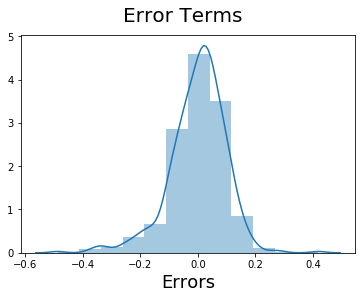

In [111]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 12)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

# Step 8: Making Predictions Using the Final Model

In [112]:
df_test.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sep,yr_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.018182,0.677273,20.875888,62.151964,13.039666,4512.109091,0.245455,0.240909,0.204545,0.104545,...,0.059091,0.481818,0.154545,0.163636,0.140909,0.104545,0.181818,0.109091,0.018182,0.318182
std,0.133913,0.468586,7.939279,13.806969,4.972285,1892.272318,0.431338,0.428610,0.404289,0.306665,...,0.236333,0.500809,0.362295,0.370789,0.348721,0.306665,0.386574,0.312464,0.133913,0.466833
min,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.760615,51.802075,9.615002,3232.750000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,21.525000,62.416650,12.396407,4655.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,28.307087,72.072950,15.719959,5840.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,34.815847,94.826100,29.584721,8167.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
#Identify the numerical variables in the dataset
numerical_var = ['temp', 'hum','windspeed', 'cnt']


df_test[numerical_var] = scaler.transform(df_test[numerical_var])

In [115]:
df_test.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sep,yr_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
566,0,0,-0.106617,-0.228506,-0.034052,-0.051976,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
374,0,1,-0.118606,-0.232062,-0.035685,-0.051988,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
181,0,0,-0.101328,-0.236128,-0.041073,-0.051962,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
529,0,1,-0.104425,-0.233312,-0.031487,-0.051933,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
233,0,1,-0.102615,-0.234929,-0.030027,-0.051971,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [118]:
#Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [131]:
X_train.columns

Index(['temp', 'season_spring', 'season_summer', 'season_winter', 'mnth_dec',
       'mnth_nov', 'mnth_sep', 'yr_1', 'weekday_Tue', 'weekday_Wed',
       'weathersit_LightSnow_LightRain', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [119]:
X_test.describe()

,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,...,mnth_sep,yr_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.018182,0.677273,-0.110236,-0.232468,-0.035237,0.245455,0.240909,0.204545,0.104545,0.063636,...,0.059091,0.481818,0.154545,0.163636,0.140909,0.104545,0.181818,0.109091,0.018182,0.318182
std,0.133913,0.468586,0.008086,0.002243,0.004708,0.431338,0.428610,0.404289,0.306665,0.244661,...,0.236333,0.500809,0.362295,0.370789,0.348721,0.306665,0.386574,0.312464,0.133913,0.466833
min,0.000000,0.000000,-0.129027,-0.242565,-0.044899,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-0.117482,-0.234149,-0.038479,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,-0.109574,-0.232425,-0.035846,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,-0.102667,-0.230856,-0.032699,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,-0.096039,-0.227160,-0.019572,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
#checking the shape of the test dataset
X_test.shape

(220, 28)

In [121]:
y_test.shape

(220,)

In [122]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [123]:
X_train.columns

Index(['temp', 'season_spring', 'season_summer', 'season_winter', 'mnth_dec',
       'mnth_nov', 'mnth_sep', 'yr_1', 'weekday_Tue', 'weekday_Wed',
       'weathersit_LightSnow_LightRain', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [124]:
X_test_m.columns

Index(['const', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'yr_1', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [132]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,temp,season_spring,season_summer,season_winter,mnth_dec,mnth_nov,mnth_sep,yr_1,weekday_Tue,weekday_Wed,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
566,1.0,-0.106617,0,0,0,0,0,0,1,0,0,1,0
374,1.0,-0.118606,1,0,0,0,0,0,1,0,0,0,0
181,1.0,-0.101328,0,0,0,0,0,0,0,0,0,0,0
529,1.0,-0.104425,0,1,0,0,0,0,1,0,0,0,0
233,1.0,-0.102615,0,0,0,0,0,0,0,0,1,0,0


In [133]:
y_pred_m = lr_16.predict(X_test_new1)

# Finding R-squared and Adjusted R-Squared for Test set

In [137]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_m)

-138755545.53188404

In [138]:
#Evaluate R-square for test

#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj_r2)

0.7905647777777778


# Step 8: Model Evaluation

<Figure size 432x288 with 0 Axes>

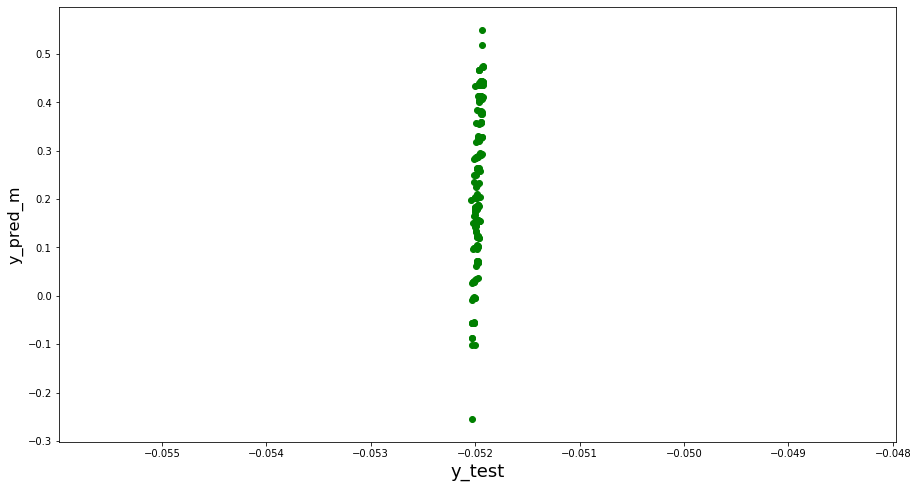

In [142]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred_m,color='green')
fig.suptitle('y_test vs y_pred_m', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred_m', fontsize=16)

plt.show()

# Visualising the fit on the test set

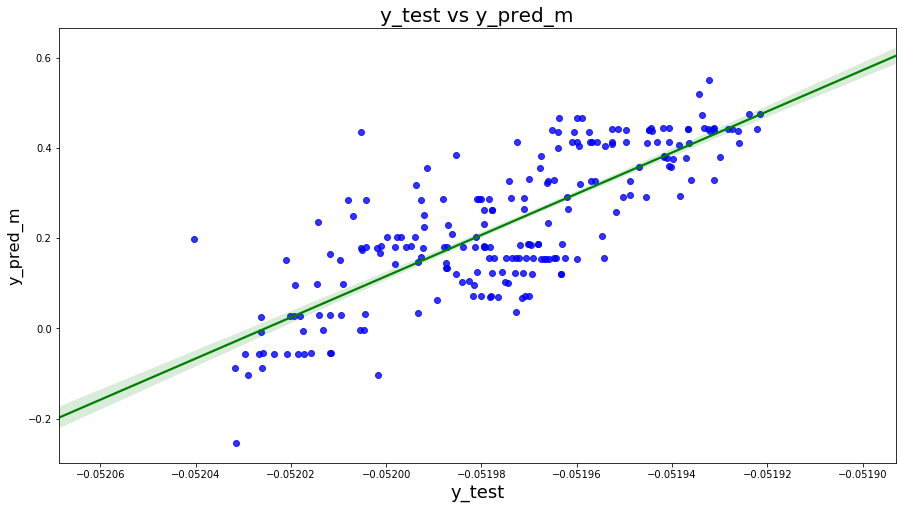

In [143]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred_m, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "green"})

plt.title('y_test vs y_pred_m', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                       
plt.ylabel('y_pred_m', fontsize=16)                          
plt.show()

# Conclusion of the analysis

In [145]:
# Print R Squared and adj. R Squared
print('R- Sqaured train: ', round(lr_16.rsquared,2), '  Adj. R-Squared train:', round(lr_16.rsquared_adj,3) )
print('R- Sqaured test : ', round(r2_score,2), '  Adj. R-Squared test :', round(r2_score_adj,3))

R- Sqaured train:  0.83   Adj. R-Squared train: 0.821


TypeError: type function doesn't define __round__ method